<a href="https://colab.research.google.com/github/IvanStukalov/MLTechnologies/blob/lab_4/lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейные модели, SVM и деревья решений.

### Выберите набор данных (датасет) для решения задачи классификации или регрессии.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [4]:
from sklearn.datasets import load_diabetes
ds = load_diabetes()

In [5]:
# признаки
ds.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
df = pd.DataFrame(ds.data,columns=ds.feature_names)
df['target'] = pd.Series(ds.target)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


<Axes: >

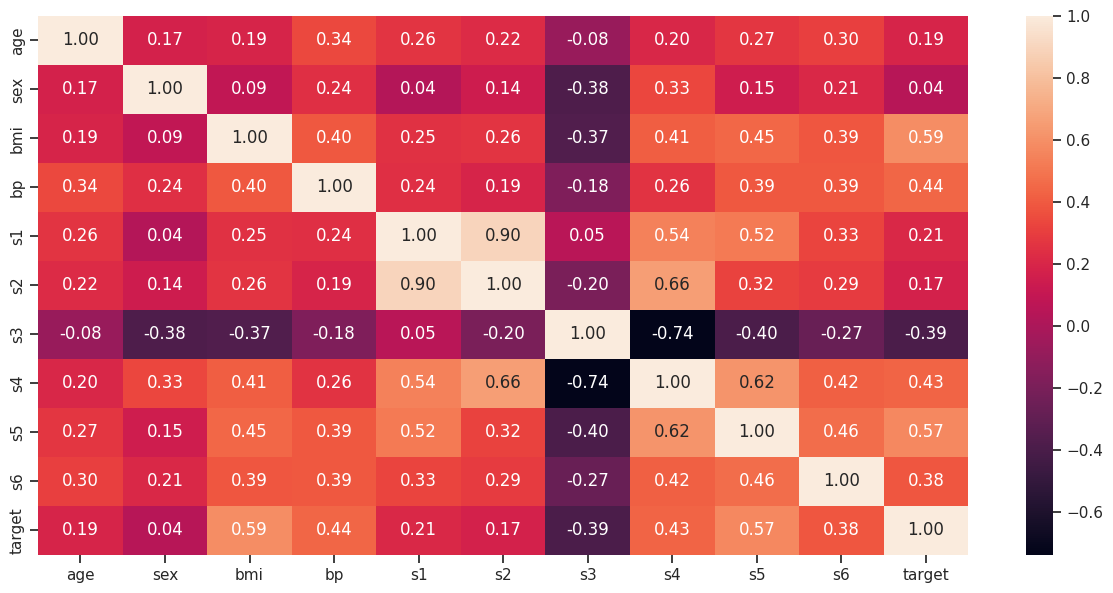

In [7]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

<Axes: xlabel='bmi', ylabel='target'>

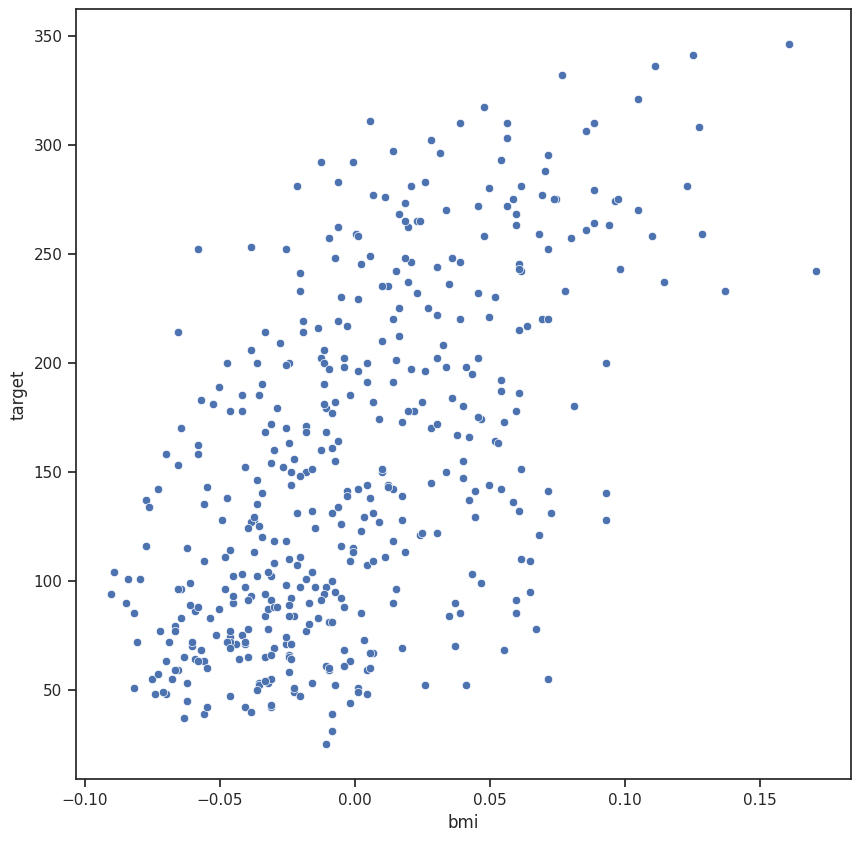

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='bmi', y='target', data=df)

Между признаком "bmi" и целевым признаком "target" существует зависимость, коэффициент корреляции = 0,59



### В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


Пропусков в датасете нет, категориальных признаков нет

### С использованием метода train_test_split разделите выборку на обучающую и тестовую.


In [13]:
from sklearn.model_selection import train_test_split

x_array = df['bmi'].values
y_array = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(x_array, y_array, test_size=0.5, random_state=1)

## Обучите следующие модели

### линейную регрессию при решении задачи регрессии

In [19]:
from sklearn.linear_model import LinearRegression

# Обучим линейную регрессию
reg1 = LinearRegression().fit(x_array.reshape(-1, 1), y_array.reshape(-1, 1))
coef = reg1.coef_[0][0]
intercept = reg1.intercept_[0]
coef, intercept

(949.4352603840387, 152.13348416289617)

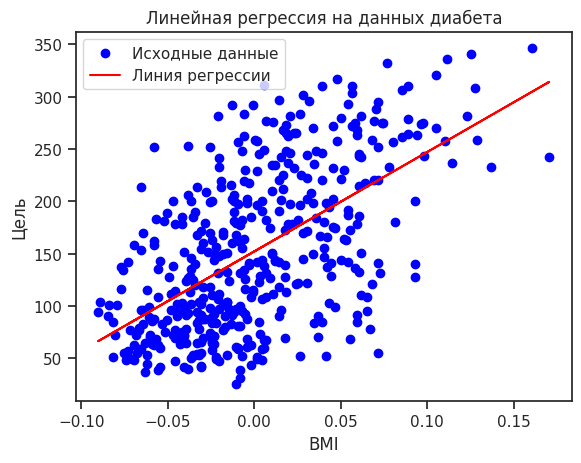

In [20]:
# Построение линии регрессии
plt.scatter(x_array, y_array, color='blue', label='Исходные данные')
plt.plot(x_array, coef * x_array + intercept, color='red', label='Линия регрессии')

# Настройка графика
plt.xlabel('BMI')
plt.ylabel('Цель')
plt.legend()
plt.title('Линейная регрессия на данных диабета')
plt.show()